# Setup

In [1]:
%load_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
%matplotlib inline

In [3]:
import warnings
from matplotlib import rc
rc('text', usetex=True)
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings

In [5]:
from relaxed.analysis import get_mah, get_ma_corrs, get_fractional_tdyn, get_am_corrs

In [6]:
params = ['cvir', 'x0', 't/|u|', 'q', 'spin', 'b_to_a', 'c_to_a', 'cvir_klypin', 'spin_bullock']
latex_params = ['c_{\\rm vir}', 'x_{\\rm off}', 't/|u|', 'q', '\\lambda', 'b/a', 'c/a', 'c_{\\rm vir, klypin},', '\\lambda_{\\rm bullock}']
colors = ['r','b', 'g', 'm', 'k', 'y', 'c', 'orange', 'pink', 'gold']
markers = np.array(['.', 'x'])

In [36]:
mah_data = get_mah('m12', '../../output/', cutoff_missing=0.05, cutoff_particle=0.05)

cat = mah_data['cat']
scales = mah_data['scales']
indices = mah_data['indices']
am = mah_data['am']
mass_bins = mah_data['mass_bins']

# m(a) correlation plots

cvir: Max corr is 0.679 at scale 0.420
x0: Max corr is -0.558 at scale 0.634
t/|u|: Max corr is -0.594 at scale 0.562
q: Max corr is 0.497 at scale 0.592
spin: Max corr is -0.348 at scale 0.504
b_to_a: Max corr is 0.466 at scale 0.592
c_to_a: Max corr is 0.478 at scale 0.592
cvir_klypin: Max corr is 0.687 at scale 0.378
spin_bullock: Max corr is -0.435 at scale 0.504


(0.15, 1.0)

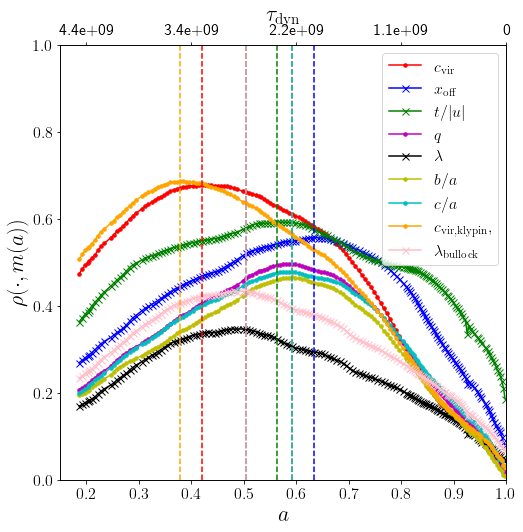

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
tdyn = np.mean(cat['tdyn']) / 10**9 # Gyr which astropy also returns by default
max_dict = {}

for j, param in enumerate(params):
    latex_param = latex_params[j]
    color = colors[j]
    corrs = get_ma_corrs(cat, param, indices)
    pos = corrs > 0 
    neg = ~pos
    _corrs = abs(corrs)
    max_indx = np.nanargmax(_corrs)
    max_dict[param] = corrs[max_indx], scales[max_indx]

    # plot positive corr and negative corr with different markers. 
    if sum(pos) > 0:
        label = f'${latex_param}$' if sum(pos) > sum(neg) else None
        ax.plot(scales[pos], _corrs[pos], color=color, marker=markers[0], label=label, markersize=7)

    if sum(neg) > 0:
        label = f'${latex_param}$' if sum(pos) < sum(neg) else None
        ax.plot(scales[neg], _corrs[neg], color=color, marker=markers[1], label=label, markersize=7)

# draw a vertical line at max scales
for j, param in enumerate(params):
    corr, scale = max_dict[param]
    color = colors[j]
    ax.axvline(scale, linestyle='--', color=color)
    print(f'{param}: Max corr is {corr:.3f} at scale {scale:.3f}')


ax.set_ylim(0, 1.0)
ax.set_xlim(0, 1.0)
# ax.set_title(r"$\log_{10} M_{\rm vir} \in [12.0, 12.2]$", size=22)
ax.set_ylabel(f"$\\rho(\\cdot, m(a))$", size=22)
ax.set_xlabel(f"$a$", size=22)
ax.tick_params(axis='both', which='major', labelsize=16)

# add additional x-axis with tydn fractional scale
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())

fractional_tdyn = get_fractional_tdyn(ax.get_xticks(), tdyn, sim_name='Bolshoi')
fractional_tdyn = np.array([f'{x:.2g}' for x in fractional_tdyn])
ax2.set_xticklabels(fractional_tdyn, size=16)
ax2.set_xlabel("$\\tau_{\\rm dyn}$", size=22)

ax.legend(loc='best', prop={'size': 16})

ax.set_xlim(0.15, 1)
ax2.set_xlim(0.15 , 1)


# a(m) correlations

cvir: Max corr is -0.698 at mass bin 0.495
x0: Max corr is 0.599 at mass bin 0.735
t/|u|: Max corr is 0.623 at mass bin 0.673
q: Max corr is -0.533 at mass bin 0.673
spin: Max corr is 0.384 at mass bin 0.541
b_to_a: Max corr is -0.505 at mass bin 0.673
c_to_a: Max corr is -0.510 at mass bin 0.644
cvir_klypin: Max corr is -0.700 at mass bin 0.397
spin_bullock: Max corr is 0.473 at mass bin 0.541


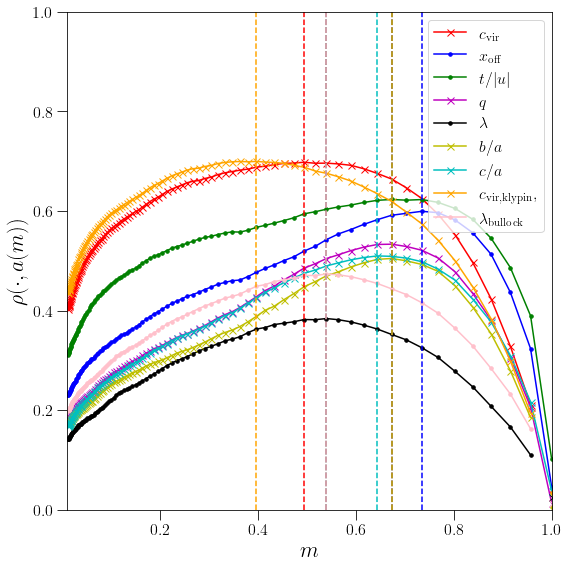

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
max_dict = {}

for j, param in enumerate(params):
    latex_param = latex_params[j]
    color = colors[j]
    corrs = get_am_corrs(cat, param, am)
    pos = corrs >= 0 
    neg = ~pos
    _corrs = abs(corrs)
    max_dict[param] = corrs[np.nanargmax(_corrs)], mass_bins[np.nanargmax(_corrs)]

    # plot positive corr and negative corr with different markers. 
    if sum(pos) > 0:
        label = f'${latex_param}$' if sum(pos) > sum(neg) else None
        ax.plot(mass_bins[pos], _corrs[pos], color=color, marker=markers[0], label=label, markersize=7)

    if sum(neg) > 0:
        label = f'${latex_param}$' if sum(pos) < sum(neg) else None
        ax.plot(mass_bins[neg], _corrs[neg], color=color, marker=markers[1], label=label, markersize=7)


# draw a vertical line at max scales
for j, param in enumerate(params):
    color = colors[j]
    corr, mbin = max_dict[param]
    ax.axvline(mbin, linestyle='--', color=color)
    print(f'{param}: Max corr is {corr:.3f} at mass bin {mbin:.3f}')


ax.set_ylim(0, 1.0)
ax.set_xlim(0.01, 1.0)
ax.set_ylabel(f"$\\rho(\\cdot, a(m))$", size=22)
ax.set_xlabel(f"$m$", size=22)
ax.tick_params(axis='both', which='major', labelsize=16, size=10)    
ax.tick_params(axis='x', which='minor', size=8)    
ax.legend(loc='best', prop={'size': 16})

plt.tight_layout()
plt.show()